In [1]:
#import modules that will be helpful in our exploration
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

#import dataset

# Assign the filename: file
file = 'chesswithranks.csv'
# Read the file into a DataFrame: df
df = pd.read_csv(file)
df.head(2)
sns.set_theme()


# Lets divide the dataframes by skill

In [2]:
Bronze = df[df.winner_rank == 'Bronze'] 
Silver = df[df.winner_rank == 'Silver'] 
Gold = df[df.winner_rank == 'Gold'] 
Platinum = df[df.winner_rank == 'Platinum'] 
Diamond = df[df.winner_rank == 'Diamond'] 
Onyx = df[df.winner_rank == 'Onyx'] 
categories = [Bronze,Silver,Gold,Platinum,Diamond,Onyx]

# Build a test graph 

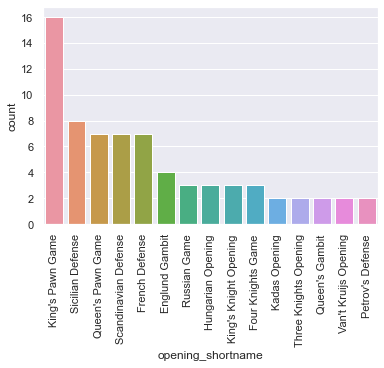

<Figure size 5040x3600 with 0 Axes>

In [3]:
#This is a test to write a function later, just getting the graph to look the way 

ax = sns.countplot(x='opening_shortname',
             data=Bronze,
             order=Bronze.opening_shortname.value_counts().head(15).index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.figure(figsize = (70,50))
plt.show()

# Looks good. Now write a function to do it over a loop, with a label and extra information

In [4]:
def cat_opening(cat):
    ax = sns.countplot(x='opening_shortname',
             data=cat,
             order=cat.opening_shortname.value_counts().head(20).index)
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
    name =[x for x in globals() if globals()[x] is cat][0]
    plt.title("%s" % name)
    print(cat.winner_rank.value_counts())
    print(cat.opening_shortname.value_counts(normalize=True).head(15))
    plt.show()

# Now try it out

Bronze    94
Name: winner_rank, dtype: int64
King's Pawn Game         0.170213
Sicilian Defense         0.085106
Queen's Pawn Game        0.074468
Scandinavian Defense     0.074468
French Defense           0.074468
Englund Gambit           0.042553
Russian Game             0.031915
Hungarian Opening        0.031915
King's Knight Opening    0.031915
Four Knights Game        0.031915
Kadas Opening            0.021277
Three Knights Opening    0.021277
Queen's Gambit           0.021277
Van't Kruijs Opening     0.021277
Petrov's Defense         0.021277
Name: opening_shortname, dtype: float64


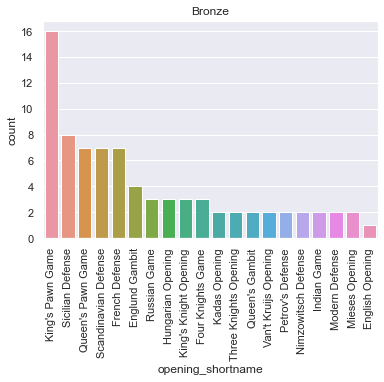

Silver    1658
Name: winner_rank, dtype: int64
King's Pawn Game         0.094089
French Defense           0.069361
Sicilian Defense         0.065742
Queen's Pawn Game        0.059710
Scandinavian Defense     0.058504
Philidor Defense         0.044029
Van't Kruijs Opening     0.040410
Italian Game             0.039807
Queen's Gambit           0.035585
Ruy Lopez                0.034379
English Opening          0.030157
Four Knights Game        0.027744
King's Knight Opening    0.022919
Caro-Kann Defense        0.022919
Russian Game             0.019300
Name: opening_shortname, dtype: float64


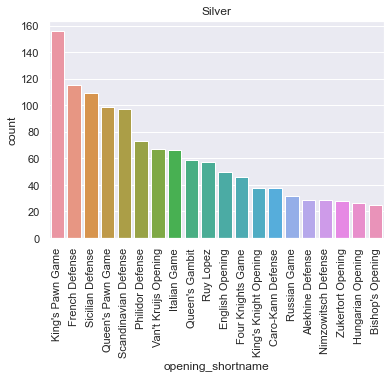

Gold    5699
Name: winner_rank, dtype: int64
Sicilian Defense        0.107036
King's Pawn Game        0.068433
French Defense          0.068082
Queen's Pawn Game       0.060888
Italian Game            0.054220
Queen's Gambit          0.044043
Philidor Defense        0.042990
Ruy Lopez               0.038779
Scandinavian Defense    0.038603
English Opening         0.037375
Scotch Game             0.030181
Caro-Kann Defense       0.026496
Van't Kruijs Opening    0.025969
Bishop's Opening        0.020354
Four Knights Game       0.019828
Name: opening_shortname, dtype: float64


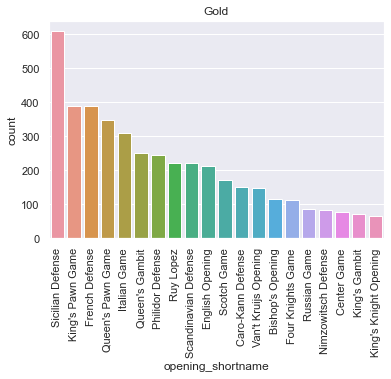

Platinum    3742
Name: winner_rank, dtype: int64
Sicilian Defense        0.147782
French Defense          0.078300
Italian Game            0.062266
Queen's Pawn Game       0.060396
Queen's Gambit          0.056120
Ruy Lopez               0.042223
Philidor Defense        0.035810
English Opening         0.031534
Caro-Kann Defense       0.031267
Scandinavian Defense    0.029663
King's Pawn Game        0.026991
Scotch Game             0.025922
Bishop's Opening        0.020043
Indian Game             0.016836
Pirc Defense            0.016836
Name: opening_shortname, dtype: float64


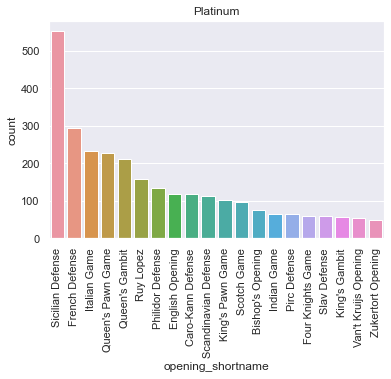

Diamond    3201
Name: winner_rank, dtype: int64
Sicilian Defense         0.170259
French Defense           0.082787
Queen's Pawn Game        0.062793
Queen's Gambit           0.050922
Ruy Lopez                0.043112
Italian Game             0.039363
English Opening          0.035301
Caro-Kann Defense        0.034364
Scandinavian Defense     0.032490
Philidor Defense         0.024367
Zukertort Opening        0.024055
Indian Game              0.022493
King's Indian Defense    0.020619
Slav Defense             0.019369
Scotch Game              0.017807
Name: opening_shortname, dtype: float64


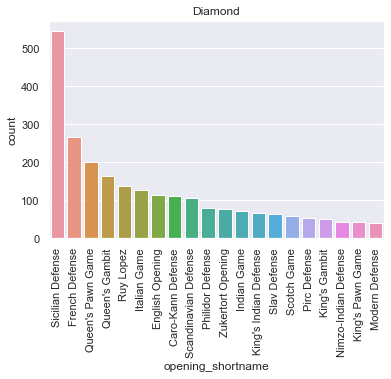

Onyx    1042
Name: winner_rank, dtype: int64
Sicilian Defense         0.196737
French Defense           0.079655
Queen's Pawn Game        0.055662
Ruy Lopez                0.054702
Queen's Gambit           0.050864
English Opening          0.043186
Caro-Kann Defense        0.040307
Italian Game             0.032630
Nimzo-Indian Defense     0.031670
Indian Game              0.025912
Scandinavian Defense     0.023033
King's Indian Defense    0.020154
Modern Defense           0.018234
Scotch Game              0.018234
Pirc Defense             0.015355
Name: opening_shortname, dtype: float64


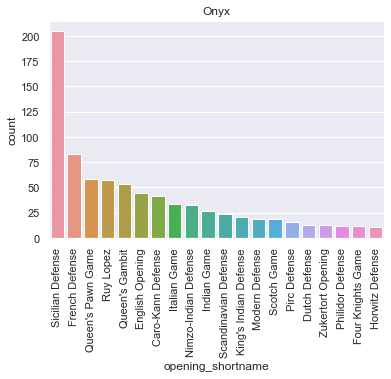

In [5]:
for cat in categories:
    cat_opening(cat)

# Wow there's a lot to break down here. Bronzes love to open with the King and Queen's Pawn game. 

# As player skill increases the use of the Sicilian Defense increases and the Queen's pawn game gets less popular and the King's pawn game almost disappears 

# Onyx level players use the Sicilian Defense most often. 

# Now lets analyze the amount of opening moves (# of moves following an opening pattern)

# We can repurpose our function to do this

In [6]:
def cat_moves(cat):
    ax = sns.countplot(x='opening_moves',
             data=cat,
             order=cat.opening_moves.value_counts().head(30).index)
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
    name =[x for x in globals() if globals()[x] is cat][0]
    plt.title("%s" % name)
    print(cat.winner_rank.value_counts())
    print(cat.opening_moves.value_counts(normalize=True).head(15))
    print(cat.opening_moves.describe())
    plt.show()

Bronze    94
Name: winner_rank, dtype: int64
3    0.340426
2    0.308511
5    0.117021
4    0.085106
1    0.063830
6    0.063830
7    0.021277
Name: opening_moves, dtype: float64
count    94.000000
mean      3.159574
std       1.424088
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       7.000000
Name: opening_moves, dtype: float64


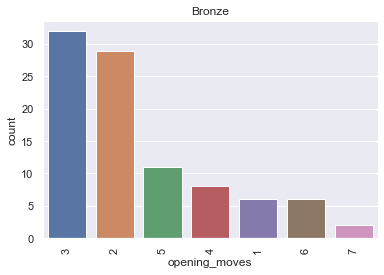

Silver    1658
Name: winner_rank, dtype: int64
3     0.227382
4     0.186972
2     0.186369
5     0.118215
1     0.089867
6     0.070567
7     0.055489
8     0.035585
9     0.014475
10    0.006031
11    0.006031
12    0.001206
17    0.001206
13    0.000603
Name: opening_moves, dtype: float64
count    1658.000000
mean        3.879976
std         2.107995
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        17.000000
Name: opening_moves, dtype: float64


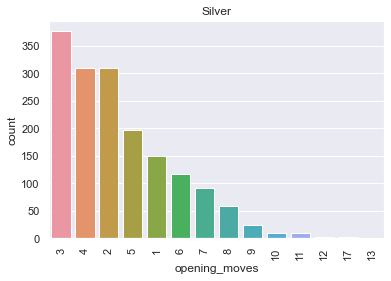

Gold    5699
Name: winner_rank, dtype: int64
3     0.199860
4     0.182137
2     0.150904
5     0.140902
6     0.103176
1     0.064397
7     0.063520
8     0.041937
9     0.022460
10    0.012634
11    0.011406
12    0.002808
13    0.002281
15    0.000526
17    0.000351
Name: opening_moves, dtype: float64
count    5699.000000
mean        4.340937
std         2.290447
min         1.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        20.000000
Name: opening_moves, dtype: float64


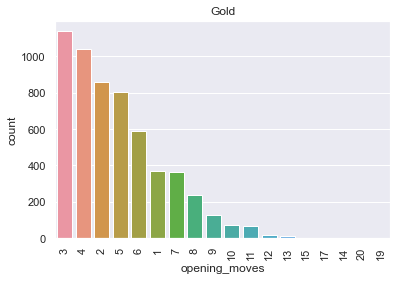

Platinum    3742
Name: winner_rank, dtype: int64
4     0.167557
3     0.159006
5     0.145110
2     0.130679
6     0.115981
7     0.071352
8     0.061464
1     0.052111
9     0.038749
11    0.022982
10    0.020577
13    0.006146
12    0.004276
14    0.001336
16    0.001069
Name: opening_moves, dtype: float64
count    3742.000000
mean        4.878140
std         2.626761
min         1.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        28.000000
Name: opening_moves, dtype: float64


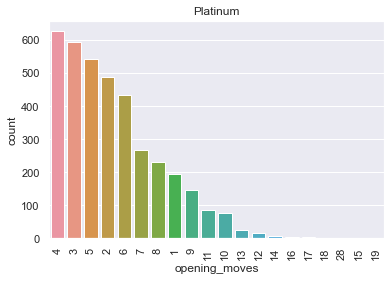

Diamond    3201
Name: winner_rank, dtype: int64
4     0.150890
3     0.138394
5     0.132771
2     0.125273
6     0.106217
8     0.077163
7     0.075914
9     0.042487
10    0.036863
11    0.034364
1     0.032490
13    0.014995
12    0.014683
14    0.005623
15    0.004374
Name: opening_moves, dtype: float64
count    3201.000000
mean        5.530147
std         3.143512
min         1.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        28.000000
Name: opening_moves, dtype: float64


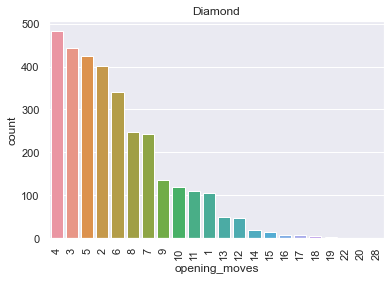

Onyx    1042
Name: winner_rank, dtype: int64
5     0.125720
2     0.116123
4     0.110365
6     0.100768
3     0.092131
9     0.080614
8     0.079655
7     0.078695
10    0.049904
11    0.046065
1     0.028791
12    0.023992
13    0.018234
15    0.012476
17    0.012476
Name: opening_moves, dtype: float64
count    1042.000000
mean        6.445298
std         3.731552
min         1.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        28.000000
Name: opening_moves, dtype: float64


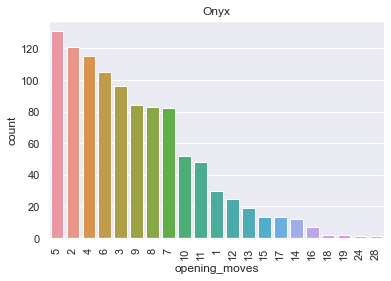

In [7]:
for cat in categories:
    cat_moves(cat)

# That is a lot to take in all at once, so lets go over how the rankings look

# Lets take a look at these groups in a histogram of the dataset

<AxesSubplot:xlabel='white_rating', ylabel='Count'>

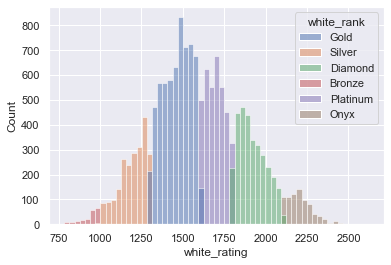

In [8]:
sns.histplot(x='white_rating',
             data=df,
            hue='white_rank')

# You can see most of the games are silver to diamond in rating, with the majority being gold. Lets see how these different groups play!





# Now lets start with Bronze, our lowest category. These players are ranked up to 1000 which is considered beginner in the chess community. These games represent 1.4% of games in this dataset (the smallest section of data)

Bronze    94
Name: winner_rank, dtype: int64
King's Pawn Game         0.170213
Sicilian Defense         0.085106
Queen's Pawn Game        0.074468
Scandinavian Defense     0.074468
French Defense           0.074468
Englund Gambit           0.042553
Russian Game             0.031915
Hungarian Opening        0.031915
King's Knight Opening    0.031915
Four Knights Game        0.031915
Kadas Opening            0.021277
Three Knights Opening    0.021277
Queen's Gambit           0.021277
Van't Kruijs Opening     0.021277
Petrov's Defense         0.021277
Name: opening_shortname, dtype: float64


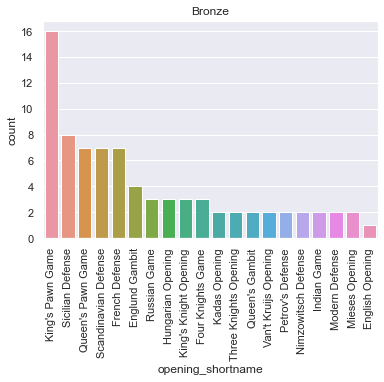

Bronze    94
Name: winner_rank, dtype: int64
3    0.340426
2    0.308511
5    0.117021
4    0.085106
1    0.063830
6    0.063830
7    0.021277
Name: opening_moves, dtype: float64
count    94.000000
mean      3.159574
std       1.424088
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       7.000000
Name: opening_moves, dtype: float64


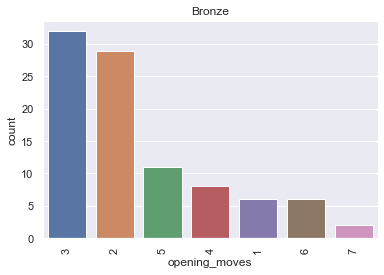

(None, None)

In [9]:
cat_opening(Bronze),cat_moves(Bronze)

# Bronze players most commonly open with King (13%) and Queen's Pawn (9%) games, and follow those patterns for an average of 3.06 moves (2 moves being the most frequent option) before doing something "on their own", or not following the sequence

# Now lets look at Silvers. These are people rated between 1000 and 1300. This is considered an amateur rating. Games at this skill level are 14% of the games in the dataset. 

Silver    1658
Name: winner_rank, dtype: int64
King's Pawn Game         0.094089
French Defense           0.069361
Sicilian Defense         0.065742
Queen's Pawn Game        0.059710
Scandinavian Defense     0.058504
Philidor Defense         0.044029
Van't Kruijs Opening     0.040410
Italian Game             0.039807
Queen's Gambit           0.035585
Ruy Lopez                0.034379
English Opening          0.030157
Four Knights Game        0.027744
King's Knight Opening    0.022919
Caro-Kann Defense        0.022919
Russian Game             0.019300
Name: opening_shortname, dtype: float64


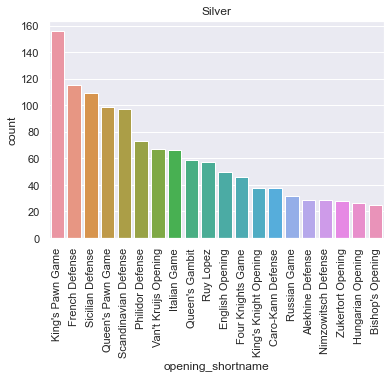

Silver    1658
Name: winner_rank, dtype: int64
3     0.227382
4     0.186972
2     0.186369
5     0.118215
1     0.089867
6     0.070567
7     0.055489
8     0.035585
9     0.014475
10    0.006031
11    0.006031
12    0.001206
17    0.001206
13    0.000603
Name: opening_moves, dtype: float64
count    1658.000000
mean        3.879976
std         2.107995
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        17.000000
Name: opening_moves, dtype: float64


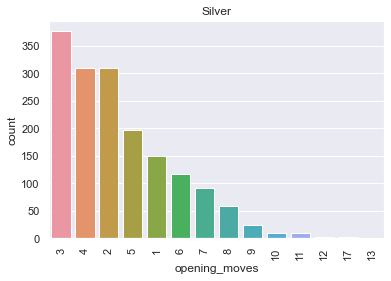

(None, None)

In [10]:
cat_opening(Silver),cat_moves(Silver)

# Silvers have a larger variety of options they play with (likely unknowlingly) and commit to their openings longer than Bronzes, and average of 3.8 moves with 3 being the most frequent. 

# Now lets look at Gold. Golds are rated between 1300-1600 and are "good" players. These aren't tournament winners or grandmasters but will definitely beat anyone in the general population. This is by far the largest chunk of players in this dataset, representing 38% of games in the dataset.

Gold    5699
Name: winner_rank, dtype: int64
Sicilian Defense        0.107036
King's Pawn Game        0.068433
French Defense          0.068082
Queen's Pawn Game       0.060888
Italian Game            0.054220
Queen's Gambit          0.044043
Philidor Defense        0.042990
Ruy Lopez               0.038779
Scandinavian Defense    0.038603
English Opening         0.037375
Scotch Game             0.030181
Caro-Kann Defense       0.026496
Van't Kruijs Opening    0.025969
Bishop's Opening        0.020354
Four Knights Game       0.019828
Name: opening_shortname, dtype: float64


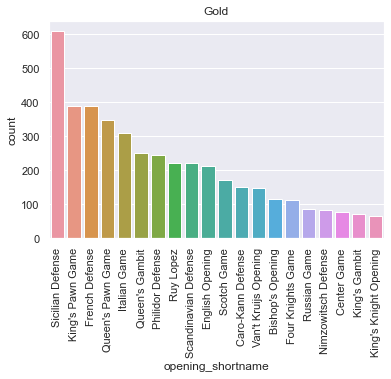

Gold    5699
Name: winner_rank, dtype: int64
3     0.199860
4     0.182137
2     0.150904
5     0.140902
6     0.103176
1     0.064397
7     0.063520
8     0.041937
9     0.022460
10    0.012634
11    0.011406
12    0.002808
13    0.002281
15    0.000526
17    0.000351
Name: opening_moves, dtype: float64
count    5699.000000
mean        4.340937
std         2.290447
min         1.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        20.000000
Name: opening_moves, dtype: float64


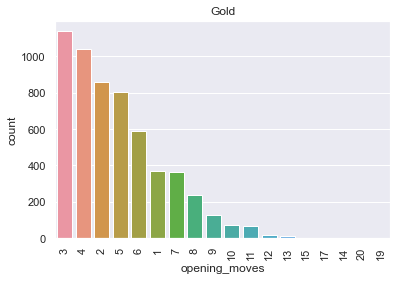

(None, None)

In [11]:
cat_opening(Gold),cat_moves(Gold)

# Golds are more likely to follow an opening for 7 moves than 1, and are the first group to have the Sicilian Defense as their number 1 opening. This will continue through the rest of the ranks. 

# Time to analyze Platinum, a group of very strong players. They are ranked between 1600-1900 and represent advanced players. These are people who may not have made it professionally but are truly gifted at the game. They represent 22.4% of the player base

Platinum    3742
Name: winner_rank, dtype: int64
Sicilian Defense        0.147782
French Defense          0.078300
Italian Game            0.062266
Queen's Pawn Game       0.060396
Queen's Gambit          0.056120
Ruy Lopez               0.042223
Philidor Defense        0.035810
English Opening         0.031534
Caro-Kann Defense       0.031267
Scandinavian Defense    0.029663
King's Pawn Game        0.026991
Scotch Game             0.025922
Bishop's Opening        0.020043
Indian Game             0.016836
Pirc Defense            0.016836
Name: opening_shortname, dtype: float64


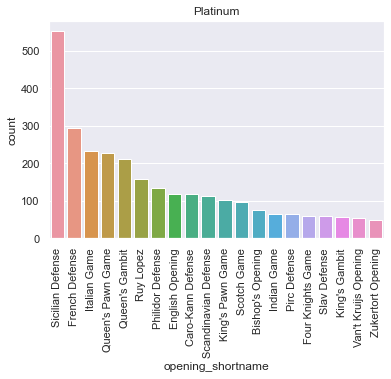

Platinum    3742
Name: winner_rank, dtype: int64
4     0.167557
3     0.159006
5     0.145110
2     0.130679
6     0.115981
7     0.071352
8     0.061464
1     0.052111
9     0.038749
11    0.022982
10    0.020577
13    0.006146
12    0.004276
14    0.001336
16    0.001069
Name: opening_moves, dtype: float64
count    3742.000000
mean        4.878140
std         2.626761
min         1.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        28.000000
Name: opening_moves, dtype: float64


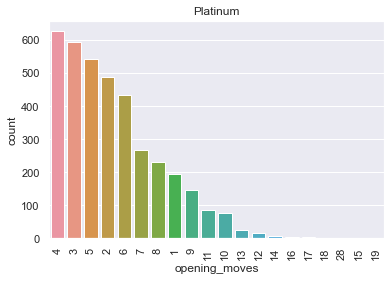

(None, None)

In [12]:
cat_opening(Platinum),cat_moves(Platinum)

# Platinum ranked players commit to their opening an average of 5 moves with 4 moves being the most repeated number. They use the Sicialian defense opening twice as much as any other opening. 

# Now lets look at diamonds, our second to the top group. They represent players from 1800-2100 rating bracket and are tremendously skilled players. They represent 19% of the dataset

Diamond    3201
Name: winner_rank, dtype: int64
Sicilian Defense         0.170259
French Defense           0.082787
Queen's Pawn Game        0.062793
Queen's Gambit           0.050922
Ruy Lopez                0.043112
Italian Game             0.039363
English Opening          0.035301
Caro-Kann Defense        0.034364
Scandinavian Defense     0.032490
Philidor Defense         0.024367
Zukertort Opening        0.024055
Indian Game              0.022493
King's Indian Defense    0.020619
Slav Defense             0.019369
Scotch Game              0.017807
Name: opening_shortname, dtype: float64


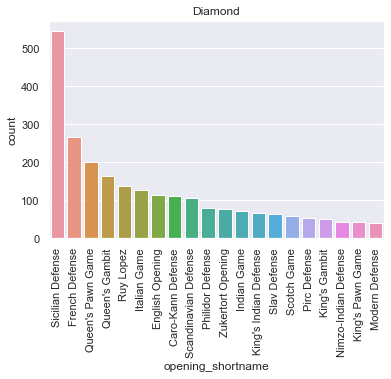

Diamond    3201
Name: winner_rank, dtype: int64
4     0.150890
3     0.138394
5     0.132771
2     0.125273
6     0.106217
8     0.077163
7     0.075914
9     0.042487
10    0.036863
11    0.034364
1     0.032490
13    0.014995
12    0.014683
14    0.005623
15    0.004374
Name: opening_moves, dtype: float64
count    3201.000000
mean        5.530147
std         3.143512
min         1.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        28.000000
Name: opening_moves, dtype: float64


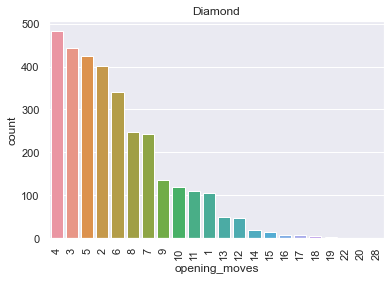

(None, None)

In [13]:
cat_opening(Diamond),cat_moves(Diamond)

# Diamonds have an average of 5.67 opening moves before diverting, and use the Sicilian Defense 16.4% of the time, with the second most often being French Defense which is around 8%.

# Now lets look at our highest rated skill group, Onyx. These are players ranked 2100+ to put this in perspective, Magnus Carlson, the highest rated player in the world is a 2800. These are exceptional players who are brilliant and make very very few mistakes. Games at this skill rating represent a little less than 5% of the games in this dataset. 

# Lets break down what makes them great. 

Onyx    1042
Name: winner_rank, dtype: int64
Sicilian Defense         0.196737
French Defense           0.079655
Queen's Pawn Game        0.055662
Ruy Lopez                0.054702
Queen's Gambit           0.050864
English Opening          0.043186
Caro-Kann Defense        0.040307
Italian Game             0.032630
Nimzo-Indian Defense     0.031670
Indian Game              0.025912
Scandinavian Defense     0.023033
King's Indian Defense    0.020154
Modern Defense           0.018234
Scotch Game              0.018234
Pirc Defense             0.015355
Name: opening_shortname, dtype: float64


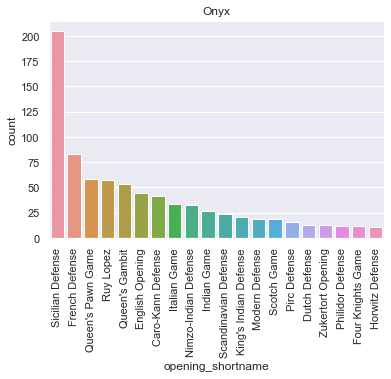

Onyx    1042
Name: winner_rank, dtype: int64
5     0.125720
2     0.116123
4     0.110365
6     0.100768
3     0.092131
9     0.080614
8     0.079655
7     0.078695
10    0.049904
11    0.046065
1     0.028791
12    0.023992
13    0.018234
15    0.012476
17    0.012476
Name: opening_moves, dtype: float64
count    1042.000000
mean        6.445298
std         3.731552
min         1.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        28.000000
Name: opening_moves, dtype: float64


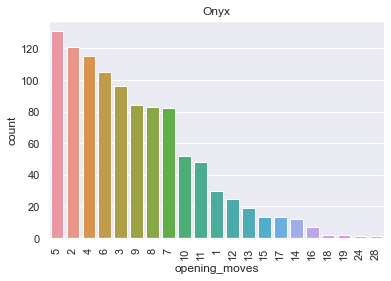

(None, None)

In [14]:
cat_opening(Onyx),cat_moves(Onyx)

# Onyx level players love the Sicilian Defense and stick to it, averaging 6.7 opening moves before making a variation from the 'book'. 

In [15]:
for cat in categories:
    print(np.mean(cat.opening_moves))

3.1595744680851063
3.8799758745476476
4.340937006492367
4.878140032068413
5.5301468291159015
6.445297504798464


In [16]:
Bronze = Bronze[Bronze.turns >2]

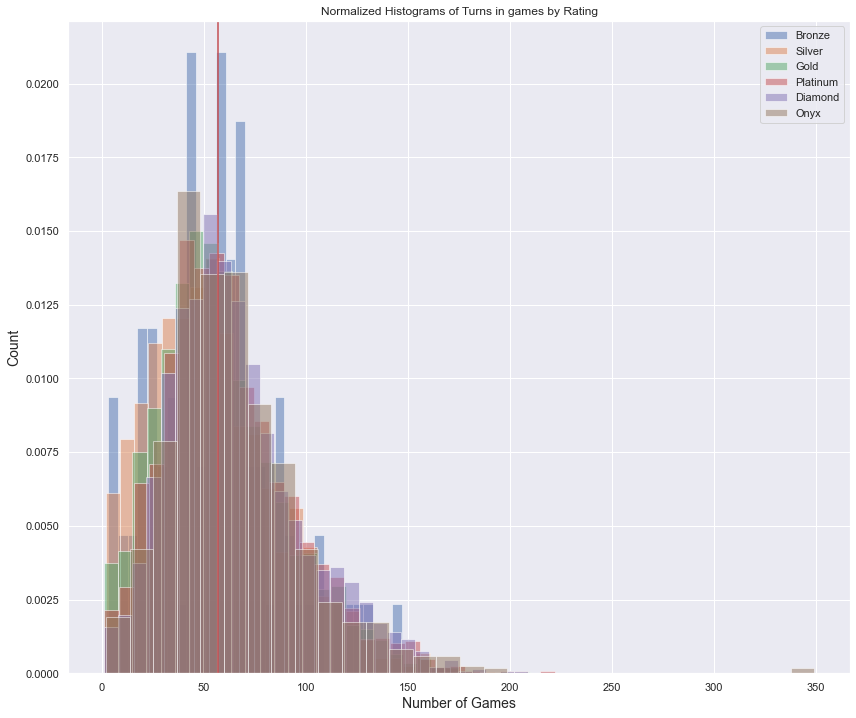

<Figure size 432x288 with 0 Axes>

In [17]:
plt.figure(figsize=(14,12))
plt.hist(Bronze.turns,bins=30,alpha=0.5,label='Bronze',density = True)
plt.hist(Silver.turns,bins=30,alpha=0.5,label='Silver',density = True)
plt.hist(Gold.turns,bins=30,alpha=0.5,label='Gold',density = True)
plt.hist(Platinum.turns,bins=30,alpha=0.5,label='Platinum',density = True)
plt.hist(Diamond.turns,bins=30,alpha=0.5,label='Diamond',density = True)
plt.hist(Onyx.turns,bins=30,alpha=0.5,label='Onyx',density = True)
med = np.median(df.turns)
plt.axvline(med,color='r')
plt.xlabel('Number of Games',size=14)
plt.ylabel('Count',size=14)
plt.title('Normalized Histograms of Turns in games by Rating')
plt.legend(loc='upper right')
plt.show()
plt.savefig('turnsbyrating.png')

In [18]:
df.columns

Index(['Unnamed: 0', 'game_id', 'winner', 'winner_rank', 'loser_rank',
       'victory_status', 'white_rating', 'white_rank', 'black_rating',
       'black_rank', 'turns', 'white_id', 'black_id', 'opening_moves',
       'opening_fullname', 'opening_shortname', 'opening_variation', 'moves',
       'upset'],
      dtype='object')

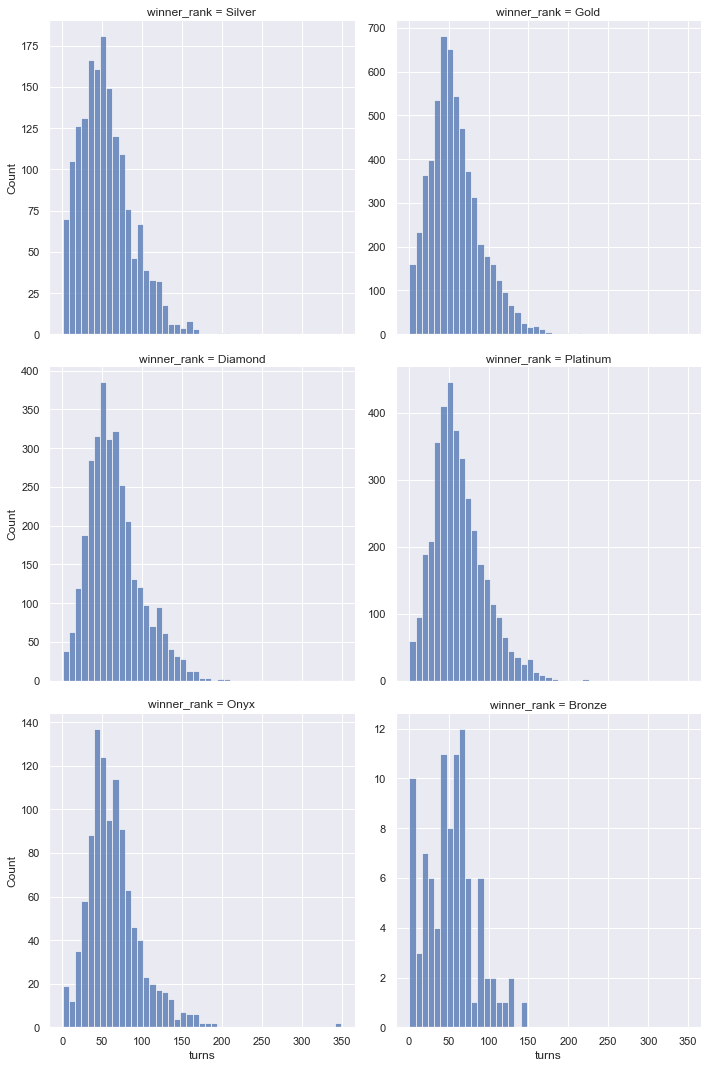

In [19]:
sns.displot(x='turns',data=df,col='winner_rank',kind='hist',bins=45,col_wrap=2,facet_kws=dict(sharey=False))
plt.savefig('save_as_a_png.png')

### Why does Bronze have such a different shape from the others?

count     89.000000
mean      55.752809
std       30.483334
min        3.000000
25%       32.000000
50%       56.000000
75%       69.000000
max      147.000000
Name: turns, dtype: float64


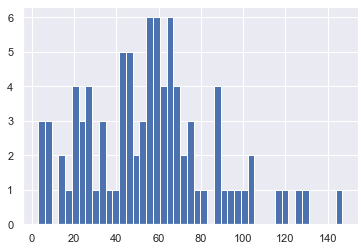

In [20]:
plt.hist(Bronze.turns,bins=45)
print(Bronze.turns.describe())

In [21]:
grouped = Bronze.groupby(['turns','victory_status'])['game_id'].count()
grouped

turns  victory_status
3      Resign            3
7      Mate              1
8      Resign            1
9      Resign            1
13     Resign            1
                        ..
116    Out of Time       1
120    Resign            1
125    Mate              1
129    Mate              1
147    Resign            1
Name: game_id, Length: 70, dtype: int64

### The irregular graph of the Bronze ranked players is due to the high number of games where they resigned in the second move

In [22]:
Bronze = Bronze[Bronze.turns>2]


(array([4., 2., 2., 5., 5., 3., 4., 1., 9., 3., 6., 9., 6., 8., 3., 3., 1.,
        4., 2., 1., 1., 2., 0., 1., 1., 1., 1., 0., 0., 1.]),
 array([  3. ,   7.8,  12.6,  17.4,  22.2,  27. ,  31.8,  36.6,  41.4,
         46.2,  51. ,  55.8,  60.6,  65.4,  70.2,  75. ,  79.8,  84.6,
         89.4,  94.2,  99. , 103.8, 108.6, 113.4, 118.2, 123. , 127.8,
        132.6, 137.4, 142.2, 147. ]),
 <BarContainer object of 30 artists>)

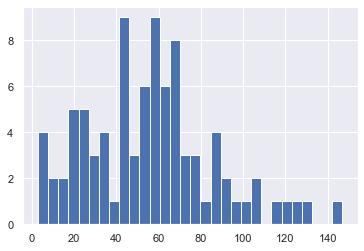

In [23]:
plt.hist(Bronze.turns,bins=30)

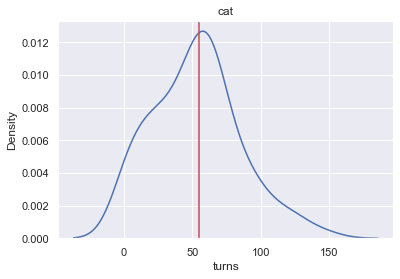

the median value is 55.0


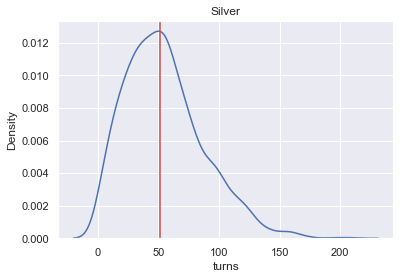

the median value is 51.0


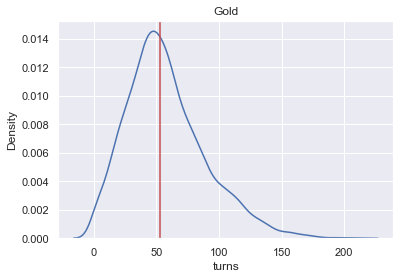

the median value is 53.0


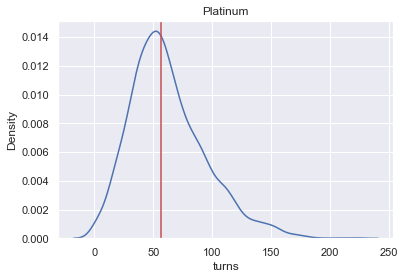

the median value is 57.0


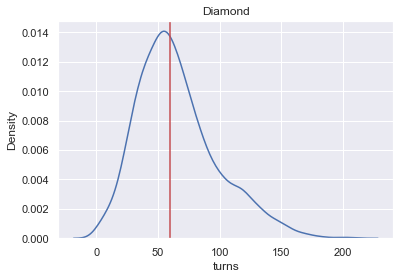

the median value is 60.0


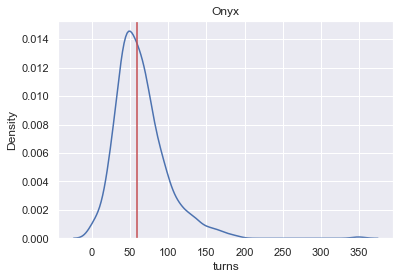

the median value is 59.0


<Figure size 432x288 with 0 Axes>

In [24]:
def kdeplot_by_cat(cat):
    sns.kdeplot(x='turns',data=cat)
    line=np.median(cat.turns)
    _ = plt.axvline(line, color='r')
    name =[x for x in globals() if globals()[x] is cat][0]
    plt.title("%s" % name)
    plt.show()
    print('the median value is '+ str(line))
    plt.savefig('kde_.png',dpi=150)

for cat in categories:
    kdeplot_by_cat(cat)


In [25]:
Bronze.loser_rank.value_counts()

Silver      41
Bronze      31
Gold        15
Platinum     2
Name: loser_rank, dtype: int64

In [26]:
crazy_upset = Silver[Silver['loser_rank'] == 'Onyx']
crazy_upset


,Unnamed: 0,game_id,winner,winner_rank,loser_rank,victory_status,white_rating,white_rank,black_rating,black_rank,turns,white_id,black_id,opening_moves,opening_fullname,opening_shortname,opening_variation,moves,upset
1706,2202,2203,White,Silver,Onyx,Mate,1293,Silver,2123,Onyx,89,dead23,dsom1234,6,Giuoco Piano,Giuoco Piano,NaN,e4 e5 Nf3 Nc6 Bc4 Bc5 a3 a5 c3 Qe7 d4 exd4 cxd...,True


In [27]:
thegame=['e4 e5 Nf3 Nc6 Bc4 Bc5 a3 a5 c3 Qe7 d4 exd4 cxd4 Qxe4+ Be3 d5 Nc3 Qg6 Bd3 Qxg2 Rg1 Qh3 Bf1 Qe6 dxc5 Nf6 Rxg7 h6 Qd2 Qf5 Rg3 Be6 Nd4 Qe5 f4 Qh5 f5 Bd7 Nxc6 Bxc6 Bd4 Qh4 O-O-O O-O-O Rh3 Qg5 Qxg5 hxg5 Bxf6 Rxh3 Bxd8 Rxc3+ bxc3 Kxd8 f6 Ke8 Re1+ Kd8 Re7 Be8 Bg2 d4 cxd4 b6 cxb6 cxb6 Kd2 b5 Kc3 g4 Bd5 b4+ axb4 a4 Bxf7 Bxf7 Rxf7 Ke8 Re7+ Kd8 Kb2 g3 hxg3 a3+ Kxa3 Kc8 f7 Kd8 f8=Q#']
thegame

['e4 e5 Nf3 Nc6 Bc4 Bc5 a3 a5 c3 Qe7 d4 exd4 cxd4 Qxe4+ Be3 d5 Nc3 Qg6 Bd3 Qxg2 Rg1 Qh3 Bf1 Qe6 dxc5 Nf6 Rxg7 h6 Qd2 Qf5 Rg3 Be6 Nd4 Qe5 f4 Qh5 f5 Bd7 Nxc6 Bxc6 Bd4 Qh4 O-O-O O-O-O Rh3 Qg5 Qxg5 hxg5 Bxf6 Rxh3 Bxd8 Rxc3+ bxc3 Kxd8 f6 Ke8 Re1+ Kd8 Re7 Be8 Bg2 d4 cxd4 b6 cxb6 cxb6 Kd2 b5 Kc3 g4 Bd5 b4+ axb4 a4 Bxf7 Bxf7 Rxf7 Ke8 Re7+ Kd8 Kb2 g3 hxg3 a3+ Kxa3 Kc8 f7 Kd8 f8=Q#']

In [28]:
Silver.loser_rank.value_counts()

Silver      982
Gold        472
Bronze      147
Platinum     40
Diamond      16
Onyx          1
Name: loser_rank, dtype: int64

In [29]:
Gold.loser_rank.value_counts()

Gold        3623
Silver      1249
Platinum     632
Bronze       100
Diamond       84
Onyx          11
Name: loser_rank, dtype: int64

In [30]:
Platinum.loser_rank.value_counts()

Platinum    1610
Gold        1354
Diamond      425
Silver       315
Bronze        23
Onyx          15
Name: loser_rank, dtype: int64

In [31]:
Diamond.loser_rank.value_counts()

Diamond     1634
Platinum     835
Gold         481
Silver       124
Onyx         123
Bronze         4
Name: loser_rank, dtype: int64

In [32]:
Onyx.loser_rank.value_counts()

Diamond     499
Onyx        311
Platinum    132
Gold         81
Silver       17
Bronze        2
Name: loser_rank, dtype: int64

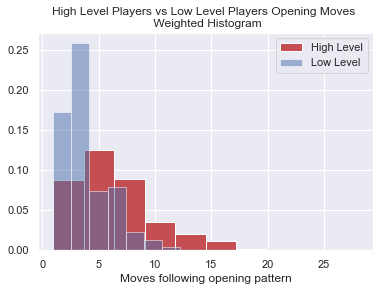

In [33]:
plt.hist(Onyx.opening_moves,density=True,color='r',label='High Level')
plt.hist(Silver.opening_moves,density=True,alpha=.5,color='b',label='Low Level')
plt.title('High Level Players vs Low Level Players Opening Moves \n Weighted Histogram')
plt.xlabel('Moves following opening pattern')
plt.legend()

In [34]:
groups = df.groupby(df.white_rating)

In [35]:
df

,Unnamed: 0,game_id,winner,winner_rank,loser_rank,victory_status,white_rating,white_rank,black_rating,black_rank,turns,white_id,black_id,opening_moves,opening_fullname,opening_shortname,opening_variation,moves,upset
0,1,2,Black,Silver,Gold,Resign,1322,Gold,1261,Silver,16,a-00,skinnerua,4,Nimzowitsch Defense: Kennedy Variation,Nimzowitsch Defense,Kennedy Variation,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,True
1,2,3,White,Gold,Gold,Mate,1496,Gold,1500,Gold,61,ischia,a-00,3,King's Pawn Game: Leonardis Variation,King's Pawn Game,Leonardis Variation,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,True
2,3,4,White,Gold,Gold,Mate,1439,Gold,1454,Gold,61,daniamurashov,adivanov2009,3,Queen's Pawn Game: Zukertort Variation,Queen's Pawn Game,Zukertort Variation,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,True
3,4,5,White,Gold,Gold,Mate,1523,Gold,1469,Gold,95,nik221107,adivanov2009,5,Philidor Defense,Philidor Defense,NaN,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,False
4,6,7,White,Gold,Gold,Resign,1520,Gold,1423,Gold,33,capa_jr,daniel_likes_chess,10,Blackmar-Diemer Gambit: Pietrowsky Defense,Blackmar-Diemer Gambit,Pietrowsky Defense,d4 d5 e4 dxe4 Nc3 Nf6 f3 exf3 Nxf3 Nc6 Bb5 a6 ...,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16150,20053,20054,White,Platinum,Silver,Resign,1691,Platinum,1220,Silver,24,belcolt,jamboger,2,Dutch Defense,Dutch Defense,NaN,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,False
16151,20054,20055,Black,Silver,Silver,Mate,1233,Silver,1196,Silver,82,jamboger,farrukhasomiddinov,2,Queen's Pawn,Queen's Pawn,NaN,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,True
16152,20055,20056,White,Silver,Silver,Mate,1219,Silver,1286,Silver,35,jamboger,schaaksmurf3,3,Queen's Pawn Game: Mason Attack,Queen's Pawn Game,Mason Attack,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,True
16153,20056,20057,White,Gold,Silver,Resign,1360,Gold,1227,Silver,109,marcodisogno,jamboger,4,Pirc Defense,Pirc Defense,NaN,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,False


In [36]:
categories

[       Unnamed: 0  game_id winner winner_rank loser_rank victory_status  \
 285           366      367  Black      Bronze     Bronze    Out of Time   
 293           374      375  Black      Bronze     Bronze    Out of Time   
 468           560      561  White      Bronze     Silver           Mate   
 475           567      568  Black      Bronze     Silver         Resign   
 517           633      634  Black      Bronze       Gold    Out of Time   
 ...           ...      ...    ...         ...        ...            ...   
 15536       19272    19273  Black      Bronze     Silver         Resign   
 15557       19293    19294  Black      Bronze     Silver         Resign   
 15843       19680    19681  Black      Bronze     Silver           Mate   
 15844       19683    19684  Black      Bronze     Silver         Resign   
 15900       19748    19749  White      Bronze     Bronze           Mate   
 
        white_rating white_rank  black_rating black_rank  turns       white_id  \
 285

In [39]:
df.sample(5)        

,Unnamed: 0,game_id,winner,winner_rank,loser_rank,victory_status,white_rating,white_rank,black_rating,black_rank,turns,white_id,black_id,opening_moves,opening_fullname,opening_shortname,opening_variation,moves,upset
7827,9765,9766,White,Gold,Gold,Resign,1440,Gold,1480,Gold,17,ozguragarr,urkazacenje,3,Center Game #2,Center Game,#2,e4 e5 d4 Qh4 Bd3 exd4 Nf3 Qg4 c3 Qxg2 Rg1 Qh3 ...,True
7442,9300,9301,Black,Gold,Silver,Resign,1230,Silver,1402,Gold,19,khabibullin,aran09,5,Three Knights Opening,Three Knights Opening,NaN,e4 e5 Nf3 Nc6 Nc3 d6 d3 f5 exf5 Bxf5 h3 Qd7 Ng...,False
9977,12505,12506,White,Diamond,Diamond,Resign,1818,Diamond,1932,Diamond,47,rived,kaksefc,3,French Defense: La Bourdonnais Variation,French Defense,La Bourdonnais Variation,e4 e6 f4 d5 e5 c5 Nf3 Nc6 Bb5 Bd7 d3 Nxe5 Bxd7...,True
2671,3396,3397,White,Diamond,Platinum,Mate,1888,Diamond,1702,Platinum,81,sanjack,gameboymaster49899,8,Scotch Game: Classical Variation,Scotch Game,Classical Variation,e4 e5 Nf3 Nc6 d4 exd4 Nxd4 Bc5 Be3 d6 Nxc6 bxc...,False
15600,19340,19341,White,Diamond,Diamond,Resign,1906,Diamond,1928,Diamond,49,laode_syahril,posmacaco,7,Scotch Game,Scotch Game,NaN,e4 e5 Nf3 Nc6 d4 exd4 Nxd4 d6 Nxc6 bxc6 Bd3 Nf...,True
